<a href="https://colab.research.google.com/github/jindaldisha/Deep-Learning-and-Neural-Networks/blob/main/Neural-Networks-with-Tensorflow/02_1_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-class Classification

When there are more than two classes as an option, it is known as multi-class classification. 

**Steps in modelling for multi-class classification**
  - Creating a model
  - Compiling a model
    - Defining a loss function (how wrong our models predictions are)
    - Setting up an optimizer (how your model should update its internal patterns to better its predictions)
    - Creating evaluation metrics (human interpretable values for how well our model is doing)
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
  - Evaluate the model
    - Visualizng the model
    - Compare predictions to ground truth (using our evaluation metrics)
- Save the model


---

We're going to build a neural network to classify images of different items of clothing.


**Labels**

Each training and test example is assigned to one of the following labels:

- 0	- T-shirt/top
- 1	- Trouser
- 2	- Pullover
- 3	- Dress
- 4	- Coat
- 5	- Sandal
- 6	- Shirt
- 7	- Sneaker
- 8	- Bag
- 9	- Ankle boot

##Import Data

In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been split into training and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [63]:
#View first training example

print(f'Training Sample:\n{train_data[0]}\n')
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [64]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [65]:
 #Create a list of label names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(classes)

10

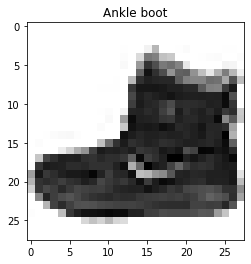

In [66]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.title(classes[train_labels[0]]);

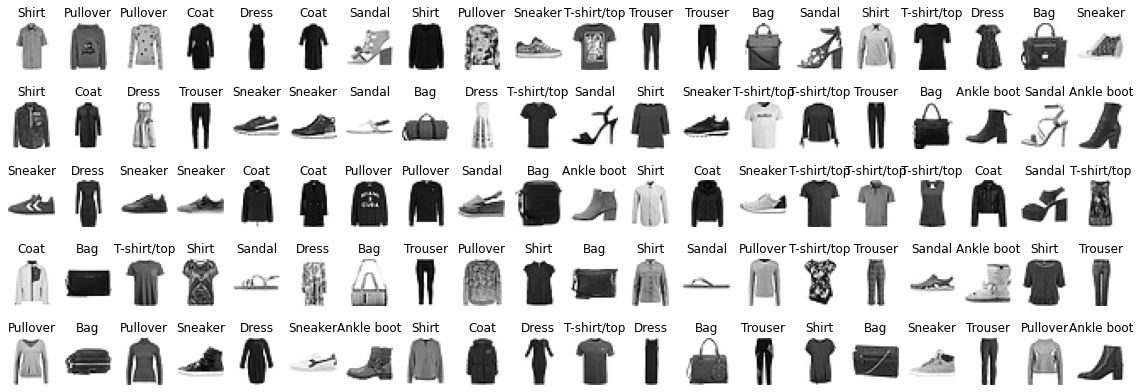

In [67]:
#Plot multiple random images 
import random
plt.figure(figsize=(20,7))
# plt.subplots_adjust(hspace=0.4, wspace=0.5)
for i in range(100):
  ax = plt.subplot(5,20,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(classes[train_labels[rand_index]])
  plt.axis(False)

##Build a Multi-Class Classification Model



## Typical architecture of a classification neural network 


The architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values that are often used in classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features| Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually ReLU (rectified linear unit) | Same as binary classification |
| Output activation | Sigmoid | Softmax |
| Loss function |Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow) | Cross entropy <br>`tf.keras.losses.CategoricalCrossentropy` when one-hot representation <br> `tf.keras.SparseCategoricalCrossentropy` when integer representation|
| Optimizer | SGD (stochastic gradient descent), Adam | Same as binary classification |


Hyperparameters is something we can adjust ourselves. 

Multilabel Clasification is often very similar to Multiclass classification.


- Input Shape = 28 x 28 (shape of the image)
- Output Shape = 10 (one per class value)


In [68]:
#Experiment Model 1
#Set random seed
tf.random.set_seed(42)

#Build a Model

# 1. Create a Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten our data to (None, 784)                           
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)                               
])

# 2. Compile the Model
model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the Model
non_norm_history = model_1.fit(
    train_data,
    train_labels, 
    epochs=10,
    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [69]:
import pandas as pd
#Function to plot history 
def plot_history(history):
  pd.DataFrame(history.history).plot()
  plt.xlabel('Epochs')
  plt.legend();

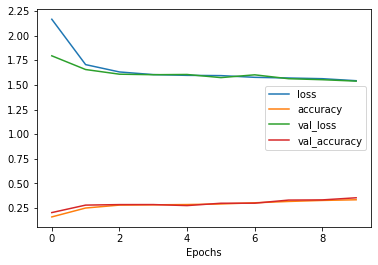

In [70]:
#Plot Hisotry of Model 1
plot_history(non_norm_history)

In [71]:
#View Model 1 Summary
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Neural Networks prefer data to be scaled.
To get better results, we need to normalize our data i.e turn it into range of (0,1). Since we're working on an images dataset, the max value of our data is 255 and the min value is 0. We can normalize our data by dividing it by the max value i.e. dividing it by 255.

In [72]:
#Normalize the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#Check min and max value of the scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [73]:
#Experiment Model 2 (Change from previous - data has been normalized)
#Set random seed
tf.random.set_seed(42)

#Build a Model

# 1. Create a Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten our data to (None, 784)                           
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)                               
])

# 2. Compile the Model
model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the Model
norm_history = model_2.fit(
    train_data_norm,
    train_labels, 
    epochs=10,
    validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

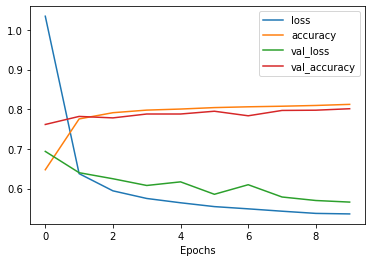

In [74]:
#Plot Hisotry of Model 1
plot_history(norm_history)

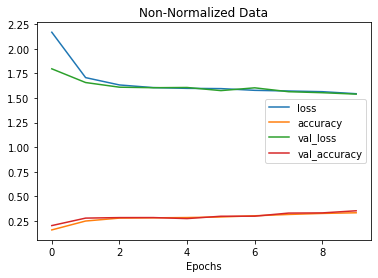

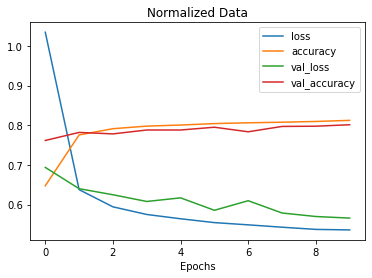

In [75]:
#Comparing Loss Curves of Non-Normalized and Normalized Data
plot_history(non_norm_history)
plt.title("Non-Normalized Data")
plot_history(norm_history)
plt.title("Normalized Data");

##Finding Ideal Learning Rate

In [76]:
#Experiment Model 3 (Change from previous - finding the ideal learning rate)

# Set random seed
tf.random.set_seed(42)

# Build the Model

# 1. Create a Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                               
])
# 2. Compile the Model
model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the Model
history = model_3.fit(
      train_data_norm,
      train_labels,
      epochs=40,
      validation_data=(test_data_norm, test_labels),
      callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

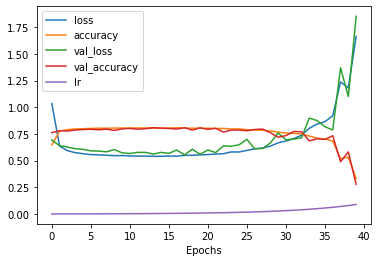

In [77]:
#Plot history
plot_history(history)

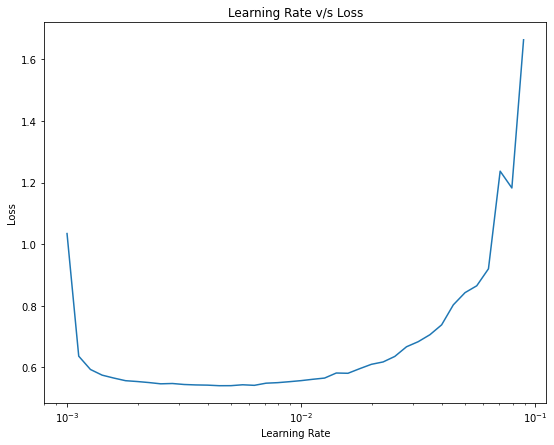

In [78]:
#Plot learning rate vs loss
lrs = 1e-3 * (10 ** (tf.range(40)/20)) #epochs=40
plt.figure(figsize=(9,7))
plt.semilogx(lrs, history.history['loss']);
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title("Learning Rate v/s Loss");

The ideal learning rate sems to be 0.001, which is the default learning rate of Adam optimizer.

In [79]:
#Experiment Model 4 (Change from previous - using the ideal learning rate previously found)

# Set random seed
tf.random.set_seed(42)

#Build the Model

# 1. Create a Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# 2. Compile the Model
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# 3. Fit the Model
history = model_4.fit(
    train_data_norm,
    train_labels,
    epochs=30,
    validation_data=(test_data_norm,test_labels)
)


Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

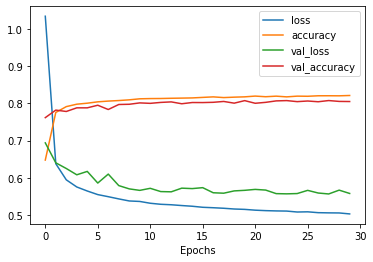

In [80]:
#Plot History
plot_history(history)

##Evaluating the Multi-Class Classification Model


To evaluate our multi-class classification model, we can:
- Evaluate its performance using classification metrics (e.g. Confusion Matrix)
- Assess its predictions (Through Visualizations)
- Improve the model
- Save and Export it to use in an application

In [81]:
#Make Predictions
y_probs = model_4.predict(test_data_norm) #Prediction Probabilities

#Turn Predictions into Integers
y_pred = tf.argmax(y_probs, axis=1)

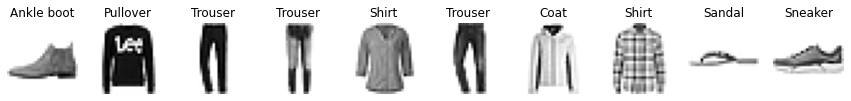

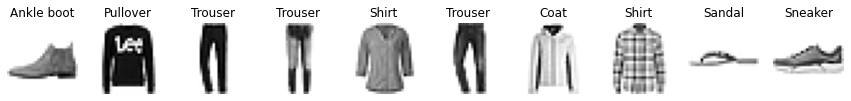

In [82]:
#View first 10 predcitions and true labels

#Predictions
plt.figure(figsize=(15,10))
for i in range(10):
  ax = plt.subplot(1,10,i+1)
  plt.imshow(test_data[i], cmap='binary')
  plt.title(classes[test_labels[i]])
  plt.axis(False)

#True Values
plt.figure(figsize=(15,10))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(test_data[i], cmap='binary')
  plt.title(classes[y_pred[i]])
  plt.axis(False)

In [83]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
cm

array([[803,  11,  26,  80,   5,   3,  63,   0,   9,   0],
       [  2, 947,   5,  30,   7,   0,   9,   0,   0,   0],
       [ 40,   1, 725,  12, 146,   0,  60,   0,  15,   1],
       [ 56,  19,  15, 817,  44,   0,  35,   2,  12,   0],
       [  2,   1, 173,  34, 728,   0,  54,   0,   7,   1],
       [  0,   1,   0,   0,   0, 887,   0,  60,  14,  38],
       [197,   8, 211,  51, 135,   1, 382,   0,  15,   0],
       [  0,   0,   0,   0,   0,  27,   0, 914,   1,  58],
       [ 10,   1,  39,  21,   6,   7,   4,   4, 905,   3],
       [  0,   0,   1,   0,   2,  11,   0,  38,   5, 943]])

In [90]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
#Function to Visualize the confusion matrix

def create_confusion_matrix(y_test, y_pred, classes=None):
  figsize = (15, 15)

  #Create confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #Normalize the confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  #Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])  

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(15)
  ax.xaxis.label.set_size(15)
  ax.title.set_size(20)

  #Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2. 

  #Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                        horizontalalignment="center",
                        color="white" if cm[i,j] > threshold else "black",
                        size=10)


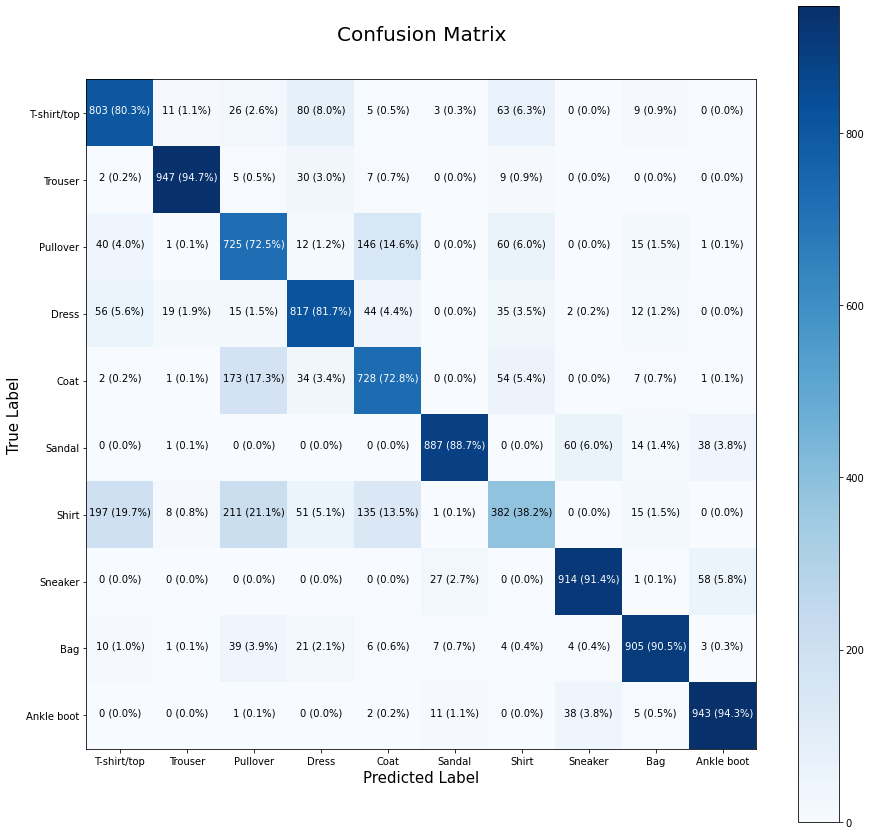

In [91]:
create_confusion_matrix(test_labels, y_pred, classes)

##Visualize Predictions

- Plot a random image
- Make prediction on the said image
- Label the plot with truth label and prediction label

In [136]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''
  #Select random n=integer
  i = random.randint(0,len(images))

  #Create predictions and targets
  target_image = images[i]

  pred_prob = model.predict(target_image.reshape(1,28,28))
  pred = pred_prob.argmax()
  pred_label = classes[pred]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap='binary')

  #Change color of title to 'green' if the prediction is right and to 'red' if the prediction is wrong.
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # xlabel = prediction/true label
  plt.xlabel(f"Pred: {pred_label} : {((tf.reduce_max(pred_prob))*100):2.0f}%, True: {true_label}", color = color)

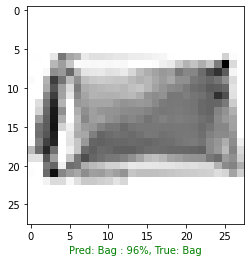

In [143]:
#Check random image
plot_random_image(model_4, test_data_norm, test_labels, classes)

##What patterns is our model learning

A Deep Learning Model is constructed of layers. And each layer has a specific role in finding patterns in the numbers that we're feeding to it.

Each value in the weights matrix corresponds to how a particular value in the dataset should influence the networks decisions.

In [146]:
#Find the layers of the model
model_4.layers, len(model_4.layers)

([<tensorflow.python.keras.layers.core.Flatten at 0x7fb754b51990>,
 4)

In [147]:
#Extract a particular layer
model_4.layers[1]

In [149]:
#Get the pattern of a layer in the network
weights, biases = model_4.layers[1].get_weights()

In [150]:
#Weigths and Weights Shapes
weights, weights.shape

(array([[ 1.1284117 , -0.3878928 , -1.4174877 , -1.5378311 ],
        [ 0.37966174, -1.0871915 , -0.7151465 , -0.04093831],
        [ 1.086073  ,  0.08612477, -1.6755824 , -0.97063124],
        ...,
        [-0.3065823 ,  0.38669962, -0.25343025,  0.3918997 ],
        [-0.3546496 ,  0.80605024,  0.37261125, -0.50785   ],
        [ 0.29081875, -0.04430885, -0.0849949 ,  0.16299716]],
       dtype=float32), (784, 4))

In [154]:
#Biases and Biases Shapes
biases, biases.shape

(array([ 0.20425925,  0.00354055, -0.18254042,  0.9638028 ], dtype=float32),
 (4,))

In [151]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


We pass our input data after numerically encoding them to our neural network. Our neural network is going to learn the representations (i.e. the patterns/ features/ weights). At the beginning, our neural network is going to initialize itself with random weights. It does this using the parameter `kernel_initializer`. We're going to show it different examples of the data we're trying to learn. And our neural network is going to update its representation outputs (weights and biases) based on these training examples. And its going to slowly adjust these patterns to better suit the data as best as it can. Ideally we aim for a case where it outputs all the correct values.

A weights matrix is has one value per data point. Whereas a bias matrix has one value per hidden layer. Every neuron has a bias vector. Each of these is paired with a weights matrix. 

The bias vector also gets initialized. It is done using the parameter `bias_initializer`. It gets initialized to zeros, atleast in the cas of a TensorFlow Dense Layer.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In each layer in a deep learning model, the previous layer is its inputs. It is called a deep learning model because its deep (i.e. it has multiple layers). A deep learning model is just a neural network model with many layer. Each layer does it work to find patterns in the data and then feeds it to the next layer.

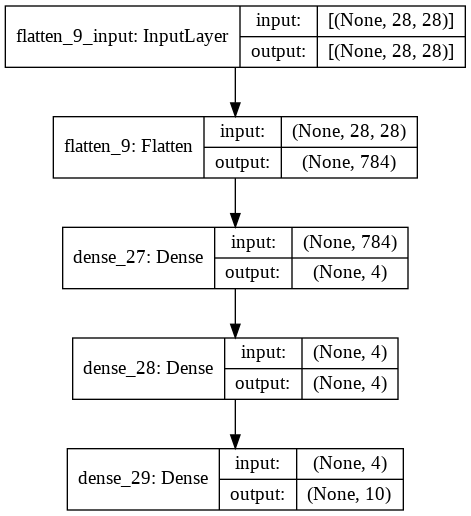

In [155]:
#View our deep learning model
from tensorflow.keras.utils import plot_model

#See inputs and outputs of each layer
plot_model(model_4, show_shapes=True)